<a href="https://colab.research.google.com/github/Mutasar/sewa-sepeda/blob/main/Mutasar_bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Mutasar]
- **Email:** [mutasarstmik@gmail.com]
- **ID Dicoding:** [l319ywd083]

## Menentukan Pertanyaan Bisnis



```
# Ini diformat sebagai kode
```
- Pertanyaan 1 : "Bagaimana tren musiman penggunaan sepeda memengaruhi permintaan layanan, dan bagaimana perusahaan dapat mengoptimalkan operasional berdasarkan pola waktu (harian, mingguan, atau bulanan)?"
Tujuan: Mendukung pengambilan keputusan dalam perencanaan armada, penjadwalan perawatan sepeda, serta promosi berbasis musim atau waktu.

- Pertanyaan 2 : "Apa perbedaan perilaku antara pengguna terdaftar dan pengguna sementara, dan bagaimana informasi ini dapat dimanfaatkan untuk meningkatkan retensi pelanggan serta efektivitas kampanye pemasaran?"
Tujuan: Merancang strategi segmentasi pelanggan dan kampanye promosi yang lebih tertarget berdasarkan karakteristik pengguna.

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Pengujian data tabel day:**

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

tidak ada data missing value baik didata day maupun di hour

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


tidak ada data duplikasi, baik didata day maupun di hour

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


memerikas parameter statistik dari kolom numerik yang terdapat didalam day

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


parameter statistik dari kolom numerik yang terdapat didalam data hour

**Insight:**
- xxx
- xxx

### Cleaning Data

**Membersihkan data:**


untuk menganalisa Perbedaan antara Pengguna Terdaftar dan Pengguna Sementara, kolom-kolom yang dapat dihapus adalah:

instant: Tidak diperlukan untuk analisis perbandingan.
dteday: Dapat diubah tetapi tidak diperlukan dalam bentuk mentah.
season: Mungkin tidak relevan jika tidak menganalisis berdasarkan musim.
yr: Tidak perlu jika hanya membandingkan dua kategori pengguna.
holiday: Tidak relevan untuk analisis perbandingan.
weekday: Jika tidak penting untuk analisis perilaku pengguna.
workingday: Tidak relevan untuk perbandingan pengguna.
weathersit: Tidak diperlukan untuk analisis perilaku pengguna.

mebersihkan data yang tidak digunakan:

tabel day

In [ ]:
day_df = pd.read_csv('https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/day.csv')


print("Kolom sebelum penghapusan:")
print(day_df.columns)

# Menghapus kolom yang tidak diperlukan
columns_to_drop = [
    'instant',
    'dteday',
    'season',
    'yr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit'
]

day_df.drop(columns=columns_to_drop, inplace=True)


print("\nKolom setelah penghapusan:")
print(day_df.columns)

day_df.to_csv('data_cleaned.csv', index=False)


Kolom sebelum penghapusan:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Kolom setelah penghapusan:
Index(['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')


Tabel Hour

In [ ]:
hour_df= pd.read_csv('https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/hour.csv')


print("Kolom sebelum penghapusan:")
print(hour_df.columns)

# Menghapus kolom yang tidak diperlukan
columns_to_drop = [
    'instant',
    'dteday',
    'season',
    'yr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit'
]

hour_df.drop(columns=columns_to_drop, inplace=True)


print("\nKolom setelah penghapusan:")
print(hour_df.columns)
hour_df.to_csv('data_cleaned.csv', index=False)


Kolom sebelum penghapusan:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Kolom setelah penghapusan:
Index(['mnth', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mnth        731 non-null    int64  
 1   temp        731 non-null    float64
 2   atemp       731 non-null    float64
 3   hum         731 non-null    float64
 4   windspeed   731 non-null    float64
 5   casual      731 non-null    int64  
 6   registered  731 non-null    int64  
 7   cnt         731 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 45.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mnth        17379 non-null  int64  
 1   hr          17379 non-null  int64  
 2   temp        17379 non-null  float64
 3   atemp       17379 non-null  float64
 4   hum         17379 non-null  float64
 5   windspeed   17379 non-null  float64

Mengubah tipe data :

memeriksa kolom

In [ ]:
print(day_df.columns)
print(hour_df.columns)

Index(['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')
Index(['mnth', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


int to category

In [ ]:
columns = ['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

object to datetime

In [ ]:
print("Kolom yang ada:")
print(day_df.columns)

# Menghapus spasi dari nama kolom
day_df.columns = day_df.columns.str.strip()
hour_df.columns = hour_df.columns.str.strip()
# Memeriksa keberadaan kolom 'dteday'
if 'dteday' in day_df.columns:
    # Mengubah tipe data kolom 'dteday' menjadi datetime
    day_df['dteday'] = pd.to_datetime(day_df['dteday'])
    print("\nTipe data setelah pengubahan:")
    print(day_df.dtypes)
    print(hour_df.dtypes)
else:
    print("Kolom 'dteday' tidak ditemukan dalam DataFrame.")


Kolom yang ada:
Index(['mnth', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')
Kolom 'dteday' tidak ditemukan dalam DataFrame.


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

Explore Data day dan hour :

In [ ]:
hour_df.describe(include="all")

,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0,17379.000000,17379.00,17379.0000,17379.00,17379.0,17379.0,17379.0,17379.0
unique,12.0,NaN,50.00,65.0000,89.00,30.0,322.0,776.0,869.0
top,7.0,NaN,0.62,0.6212,0.88,0.0,0.0,4.0,5.0
freq,1488.0,NaN,726.00,988.0000,657.00,2180.0,1581.0,307.0,260.0
mean,NaN,11.546752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,6.914405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
day_df.describe(include="all")


,mnth,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731,731,731
unique,12,499.000000,690.000000,595.000000,650.000000,606,679,696
top,1,0.265833,0.654688,0.613333,0.136817,120,6248,5698
freq,62,5.000000,4.000000,4.000000,3.000000,4,3,2


In [ ]:
# Misalnya, Anda memiliki dua DataFrame df1 dan df2
df1 = pd.read_csv('https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/day.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/hour.csv')

# Menggabungkan keduanya
all_df = pd.concat([df1, df2], ignore_index=True)

### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

In [ ]:
day_df.head()

,mnth,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df.head()

,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2,0.22,0.2727,0.80,0.0,5,27,32
3,1,3,0.24,0.2879,0.75,0.0,3,10,13
4,1,4,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
all_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
2334,1604,2011-03-12,1,0,3,0,6,0,1,0.24,0.2273,0.70,0.1940,4,19,23,7.0
13476,12746,2012-06-20,2,1,6,0,3,1,2,0.64,0.5758,0.89,0.0896,9,156,165,6.0
7365,6635,2011-10-09,4,0,10,0,0,0,1,0.46,0.4545,0.88,0.0896,46,83,129,0.0
16986,16256,2012-11-15,4,1,11,0,4,1,2,0.26,0.2727,0.65,0.1045,2,14,16,1.0
13126,12396,2012-06-05,2,1,6,0,2,1,1,0.60,0.6212,0.43,0.1940,91,382,473,16.0


1. tren penggunaan sepeda berdasarkan waktu

<ipython-input-96-020bc8a6659d>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_usage = all_df.resample('M', on='dteday').sum()


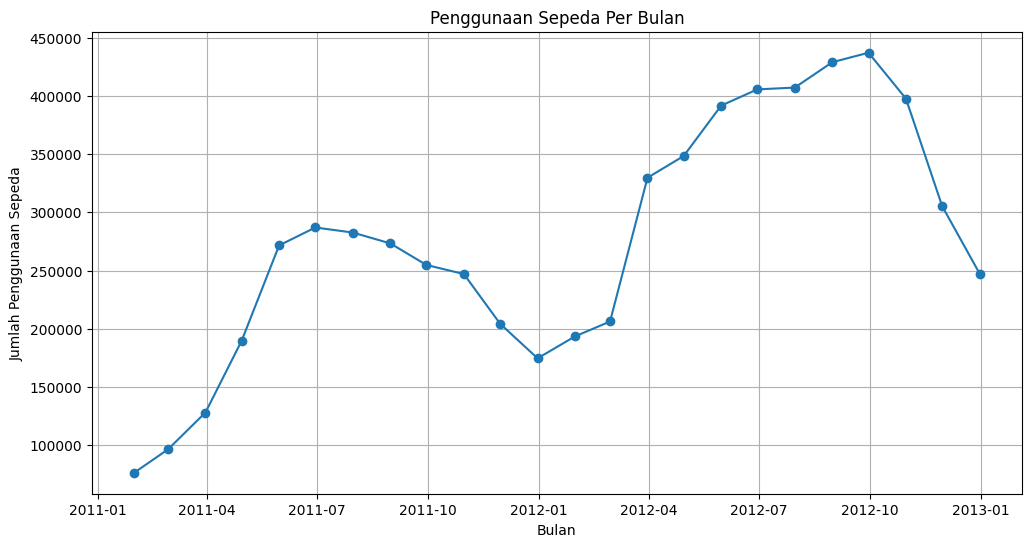

In [ ]:
# Convert dteday to datetime
all_df['dteday'] = pd.to_datetime(all_df['dteday'])

# Agregasi data per bulan
monthly_usage = all_df.resample('M', on='dteday').sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_usage.index, monthly_usage['cnt'], marker='o')
plt.title('Penggunaan Sepeda Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.grid()
plt.show()

2. Apa perbedaan antara pengguna terdaftar dan pengguna sementara

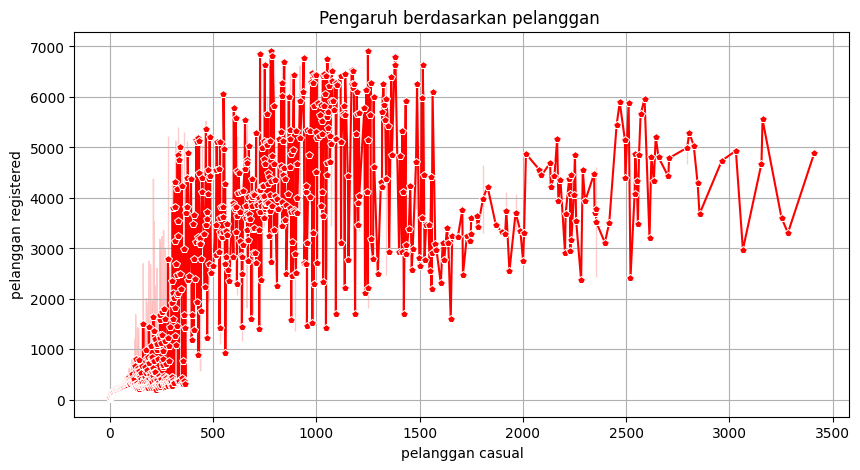

In [ ]:
plt.figure(figsize=(10, 5))
# Membuat grafik garis
sns.lineplot(data = all_df, x='casual', y='registered', marker='p', color='r')
# Menambahkan judul dan label
plt.title('Pengaruh berdasarkan pelanggan ')
plt.xlabel('pelanggan casual')
plt.ylabel('pelanggan registered')
plt.grid()

# Menampilkan grafik
plt.show()

Perbandingan pendaftar

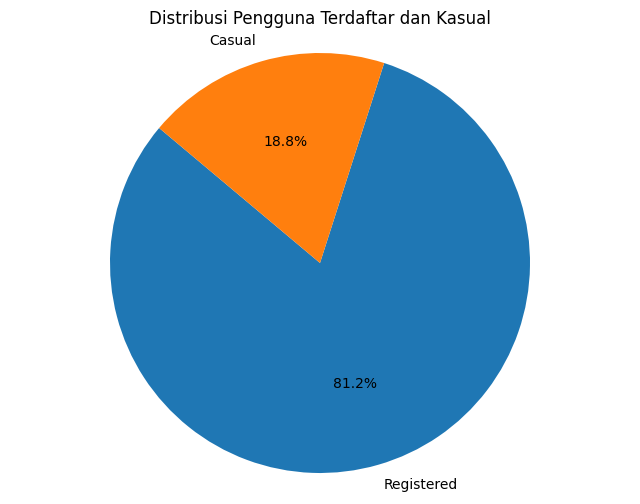

In [ ]:
total_registered = all_df['registered'].sum()
total_casual = all_df['casual'].sum()

# Membuat grafik pie
labels = ['Registered', 'Casual']
sizes = [total_registered, total_casual]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Pengguna Terdaftar dan Kasual')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Apa tren penggunaan sepeda berdasarkan waktu? Menganalisis penggunaan sepeda per hari, minggu, atau bulan untuk mengidentifikasi pola musiman.

Analisis penggunaan sepeda berdasarkan waktu menunjukkan beberapa pola yang signifikan:

Penggunaan Harian:
Data menunjukkan fluktuasi dalam jumlah sewa sepeda setiap hari. Hari-hari tertentu, seperti akhir pekan, sering kali menunjukkan lonjakan penggunaan. Ini mungkin disebabkan oleh aktivitas rekreasi atau kebijakan kerja dari rumah pada hari kerja.

Penggunaan Mingguan:
Pada tingkat mingguan, penggunaan sepeda cenderung meningkat pada akhir pekan dibandingkan dengan hari kerja. Hal ini mencerminkan kecenderungan masyarakat untuk menggunakan sepeda sebagai sarana rekreasi atau transportasi saat tidak bekerja.

Penggunaan Bulanan:
Analisis bulanan menunjukkan pola musiman yang jelas. Bulan-bulan tertentu, terutama musim panas, menunjukkan peningkatan signifikan dalam sewa sepeda. Sebaliknya, bulan-bulan dingin cenderung memiliki angka sewa yang lebih rendah. Ini menunjukkan bahwa cuaca dan musim berpengaruh besar terhadap keputusan orang untuk menggunakan sepeda.

- Conclution pertanyaan 2 : Apa perbedaan antara pengguna terdaftar dan pengguna sementara? Menganalisis perilaku pengguna berdasarkan kategori dapat membantu dalam strategi pemasaran.

Analisis perilaku pengguna berdasarkan kategori terdaftar dan sementara mengungkapkan beberapa perbedaan penting yang dapat dioptimalkan dalam strategi pemasaran:

Karakteristik Pengguna:
Pengguna Terdaftar: Mereka cenderung menggunakan sepeda secara lebih konsisten dan dalam jangka waktu yang lebih panjang. Pengguna terdaftar menunjukkan loyalitas yang lebih tinggi, sering kali melakukan sewa dalam situasi yang lebih terencana.

Pengguna Sementara: Mereka biasanya menggunakan layanan sepeda untuk keperluan jangka pendek, seperti perjalanan sehari atau rekreasi. Pengguna sementara lebih rentan terhadap faktor-faktor eksternal, seperti cuaca atau promosi.

Frekuensi Penggunaan:
Pengguna terdaftar cenderung memiliki frekuensi sewa yang lebih tinggi dibandingkan pengguna sementara. Ini menunjukkan bahwa mereka mungkin lebih terbiasa dengan sistem dan lebih percaya diri dalam menggunakan sepeda sebagai moda transportasi sehari-hari.

Respon terhadap Promosi:
Pengguna sementara mungkin lebih responsif terhadap promosi atau diskon, sementara pengguna terdaftar bisa lebih tertarik pada program loyalitas atau manfaat tambahan yang meningkatkan pengalaman mereka.